In [95]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_circles
from keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

In [120]:
X,y=make_circles(1000,factor=0.3,noise=0.1)

In [121]:
ohe=OneHotEncoder(categories="auto")

In [122]:
y_hot=ohe.fit_transform(y.reshape(-1,1)).todense()

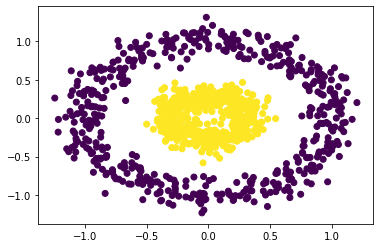

In [123]:
plt.scatter(X[:,0],X[:,1],c=y)

In [100]:
model=Sequential()
layer_1=Dense(4, activation="relu",input_shape=[2])
layer_2=Dense(2, activation="softmax")
model.add(layer_1)
model.add(layer_2)
model.summary()      #Parameter depends upon number of weights + bias 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [112]:
model.fit(X,y_hot,epochs=40,batch_size=30)

Epoch 1/40
1000/1000 [==============================] - 0s 52us/step - loss: 0.0421 - acc: 0.9970
Epoch 2/40
1000/1000 [==============================] - 0s 60us/step - loss: 0.0417 - acc: 0.9970
Epoch 3/40
1000/1000 [==============================] - 0s 58us/step - loss: 0.0413 - acc: 0.9970
Epoch 4/40
1000/1000 [==============================] - 0s 76us/step - loss: 0.0410 - acc: 0.9970
Epoch 5/40
1000/1000 [==============================] - 0s 52us/step - loss: 0.0405 - acc: 0.9970
Epoch 6/40
1000/1000 [==============================] - 0s 47us/step - loss: 0.0401 - acc: 0.9970
Epoch 7/40
1000/1000 [==============================] - 0s 46us/step - loss: 0.0398 - acc: 0.9970
Epoch 8/40
1000/1000 [==============================] - 0s 50us/step - loss: 0.0394 - acc: 0.9970
Epoch 9/40
1000/1000 [==============================] - 0s 48us/step - loss: 0.0391 - acc: 0.9970
Epoch 10/40
1000/1000 [==============================] - 0s 60us/step - loss: 0.0388 - acc: 0.9970
Epoch 11/40
1000/10

In [44]:
#model.evaluate()

In [45]:
X.shape

(1000, 2)

In [46]:
y_hot

matrix([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [1., 0.],
        [1., 0.],
        [0., 1.]])

# On Mnist Data

In [137]:
data=pd.read_csv("mnist_train_small.csv")

In [138]:
data=data.values

In [139]:
X_d=data[:,2:]
y_d=data[:,1]

In [140]:
ohe=OneHotEncoder(categories="auto")

In [141]:
y_hot=ohe.fit_transform(y_d.reshape(-1,1)).todense()

In [142]:
y_hot.shape

(8000, 10)

In [143]:
X_d.shape

(8000, 784)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, test_size=0.33, random_state=42)

In [145]:
y_hot_=ohe.fit_transform(y_train.reshape(-1,1)).todense()

In [146]:
y_hot_.shape

(5360, 10)

In [147]:
model=Sequential()
layer_1=Dense(16, activation="relu",input_shape=[784])
layer_2=Dense(16, activation="relu")
layer_8=Dense(10, activation="softmax")
model.add(layer_1)
model.add(layer_2)
model.add(layer_8)
model.summary()  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_23 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [149]:
model.fit(X_d,y_hot,epochs=50,batch_size=30)

Epoch 1/50
8000/8000 [==============================] - 2s 303us/step - loss: 4.6786 - acc: 0.2986
Epoch 2/50
8000/8000 [==============================] - 1s 98us/step - loss: 1.6743 - acc: 0.3945
Epoch 3/50
8000/8000 [==============================] - 1s 88us/step - loss: 1.4137 - acc: 0.5220
Epoch 4/50
8000/8000 [==============================] - 1s 84us/step - loss: 1.2127 - acc: 0.6058
Epoch 5/50
8000/8000 [==============================] - 1s 85us/step - loss: 1.0113 - acc: 0.6708
Epoch 6/50
8000/8000 [==============================] - 1s 84us/step - loss: 0.8846 - acc: 0.6998
Epoch 7/50
8000/8000 [==============================] - 1s 82us/step - loss: 0.8089 - acc: 0.7211
Epoch 8/50
8000/8000 [==============================] - 1s 84us/step - loss: 0.7555 - acc: 0.7413
Epoch 9/50
8000/8000 [==============================] - 1s 87us/step - loss: 0.7109 - acc: 0.7447
Epoch 10/50
8000/8000 [==============================] - 1s 83us/step - loss: 0.6497 - acc: 0.7821
Epoch 11/50
8000/8

In [150]:
y_hot_test=ohe.fit_transform(y_test.reshape(-1,1)).todense()

In [151]:
model.evaluate(X_test,y_hot_test)

2640/2640 [==============================] - 0s 111us/step


[0.22957732186398722, 0.9420454545454545]

In [162]:
np.argmax(model.predict(X_test[:1]),axis=1)

array([9], dtype=int64)

In [153]:
y_hot_test[0]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

# Handwritten recognition

In [166]:
import cv2

In [167]:
one=cv2.imread("one.jpeg")

In [168]:
gray=cv2.cvtColor(one,cv2.COLOR_BGR2GRAY)

In [169]:
small=cv2.resize(gray,(28,28))

In [170]:
small=(small<100).astype(int) * 255 #tHIS IS THE PROCESS OF DATA CLEANING LIKE CONVERTING THE DATA IN WHICH MODEL CAN TRAIN AMAZINGLY

In [171]:
np.argmax(model.predict(np.array([small.flatten()])))

1

# 1 IS BLACK AND 0 IS WHITE